In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [5]:
df1 = pd.read_csv('olist_orders_dataset.csv')
df2 = pd.read_csv('olist_customers_dataset.csv')
df3 = pd.read_csv('olist_order_payments_dataset.csv')

In [30]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<clas

In [6]:
cols = ['customer_id', 'order_id', 'order_purchase_timestamp', 'order_status']
orders = df1[cols]
orders =  orders.set_index('customer_id')
orders.drop_duplicates(inplace=True)

cols = ['order_id', 'payment_value']
payment = df3[cols]
payment = payment.set_index('order_id')
payment.drop_duplicates(inplace=True)

cols = ['customer_id', 'customer_unique_id']
customers = df2[cols]
customers = customers.set_index('customer_id')

elog=pd.concat([orders,customers], axis=1, join='inner')
elog.reset_index(inplace=True)

cols = ['customer_unique_id', 'order_purchase_timestamp', 'order_status']
elog = elog[cols]

elog['order_purchase_timestamp'] = pd.to_datetime(elog['order_purchase_timestamp'])
elog['order_date'] = elog.order_purchase_timestamp.dt.date
elog['order_date'] = pd.to_datetime(elog['order_date'])

cols = ['customer_unique_id', 'order_date', 'order_status']
elog = elog[cols]

elog.columns = ['Customer ID', 'Order_Date', 'Order_Status' ]

elog.info()
display(elog.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
Customer ID     99441 non-null object
Order_Date      99441 non-null datetime64[ns]
Order_Status    99441 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ MB


,Customer ID,Order_Date,Order_Status
67948,bab6c17a869a2f61f17e8a429e919c2c,2018-03-16,delivered
24204,d104a1857bcb78c73dec2ac5a46ca210,2017-05-25,delivered
20382,54e9f0e28137f3e89ef79d32704ec303,2017-12-07,delivered
32971,c9f633ba06746056943f5e6d4bf1f1cd,2017-11-06,delivered
7338,238aa5978c106a7d5a873faf150e75fc,2017-12-03,delivered


In [7]:
p = payment.aggregate(['sum','count', 'max'])
print(p)

       payment_value
sum       7773585.14
count       29077.00
max         13664.08


In [8]:
first_merge = pd.merge(df1,df3, on = 'order_id')
cols = ['customer_id', 'order_id', 'order_purchase_timestamp', 'payment_value', 'order_status']
first_merge = first_merge[cols]

first_merge['order_purchase_timestamp'] = pd.to_datetime(first_merge['order_purchase_timestamp'])
first_merge['order_purchase_timestamp'] = first_merge.order_purchase_timestamp.dt.date
first_merge['order_purchase_timestamp'] = pd.to_datetime(first_merge['order_purchase_timestamp'])

first_merge.columns = ['customer_id', 'order_id', 'order_date', 'sales', 'order_status']

first_merge.info
display(first_merge.sample(5))

,customer_id,order_id,order_date,sales,order_status
33862,b101d0e68d719e2d868bc96624f0c471,9d7aed3d4801f8607e1fd449c6c11fd2,2017-09-10,245.35,delivered
39260,70a7136931d143222e79c6393ccc524d,0f7dc069548c19f11ff030e2433b8c08,2017-08-26,45.00,delivered
102723,7f148c3a12b98bfccd2c119c3c97a9e4,cf63ae7deea63fed5306a81bae27e4f8,2018-04-15,188.67,delivered
89869,1596ba8ece28220881f4ac1e07014b39,212c15b59573b9d8f5237f680f1f4719,2017-08-09,88.01,delivered
14243,7f0159ff5eb1228f2805de20fc5b6c25,236636425340d1fcd5ba19f6b9a38319,2017-06-01,316.58,delivered


In [9]:
second_merge = pd.merge(first_merge,df2, on = 'customer_id')
cols = ['customer_unique_id', 'order_id', 'order_date', 'sales', 'order_status']
second_merge = second_merge[cols]



second_merge.columns = ['Customer ID', 'Order ID', 'Order Date', 'Sales', 'Order Status']

second_merge.info
display(second_merge.sample(5))

,Customer ID,Order ID,Order Date,Sales,Order Status
61449,5049c2e7d068d415c5bdbe2a22532de6,8208bbf85f1571dd07e86e66adddc395,2017-07-04,145.15,delivered
40537,2b48a3cec8aa23ef901b3edf2689d5c5,ffd3ff583dec4975e6443d6a396f2f36,2017-11-23,172.09,delivered
17243,0dd40ed947e3bfce516044118429afb0,7c363fbfb4e41c26246ea6097cd275bf,2018-04-17,231.55,delivered
14867,ed83458aeab7795e07b8b53bc983c008,c70fef01838263b8faae59464fd721a3,2017-11-02,367.20,delivered
62348,9742cc7599fb25ee8555efc615ff013d,a04b6ad9c324577c000835fca4587931,2018-02-08,592.16,delivered


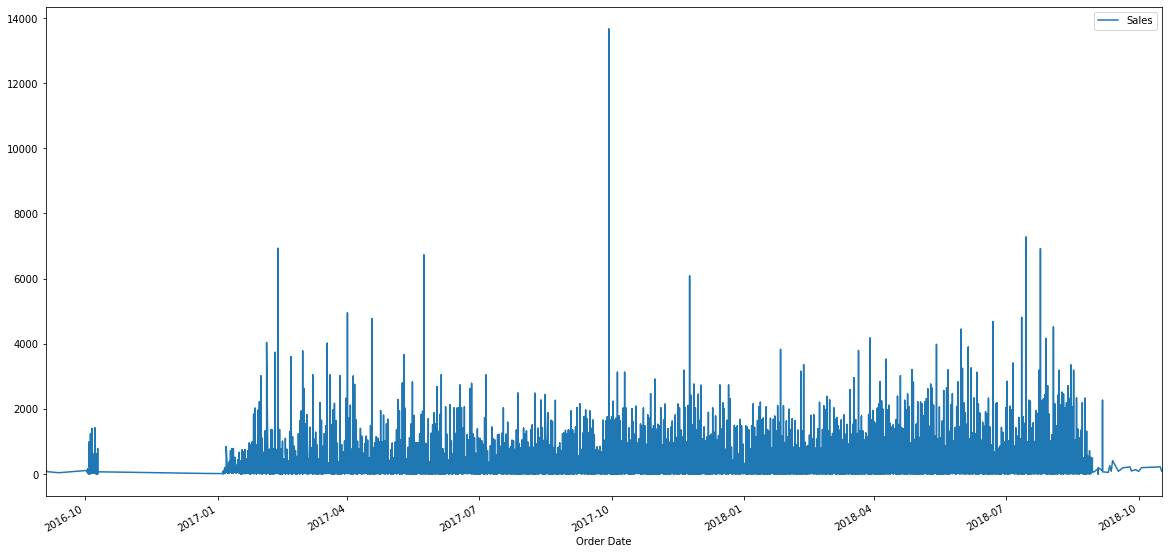

In [10]:
second_merge.groupby('Sales').agg(['sum']).reset_index()
second_merge.plot(figsize=(20,10), x='Order Date', y='Sales',kind="line")
plt.show()

In [11]:
df_RFM = second_merge.groupby('Customer ID').agg({'Order Date': lambda y: (second_merge['Order Date'].max().date() - y.max().date()).days,
                                              'Order ID': 'count',  
                                              'Sales': lambda y: round(y.sum(),2)})

df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
df_RFM = df_RFM.sort_values('Monetary', ascending=False)
df_RFM.head() 

,Recency,Frequency,Monetary
Customer ID,,,
0a0a92112bd4c708ca5fde585afaa872,383,1,13664.08
46450c74a0d8c5ca9395da1daac6c120,61,3,9553.02
da122df9eeddfedc1dc1f5349a1a690c,564,2,7571.63
763c8b1c9c68a0229c42c9fc6f662b93,94,1,7274.88
dc4802a71eae9be1dd28f5d788ceb526,612,1,6929.31


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2991f9e8>,
      dtype=object)

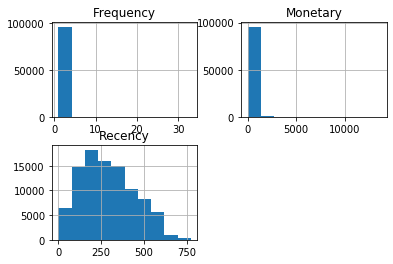

In [13]:
df_RFM.hist()

In [14]:
# We will use the 80% quantile for each feature
quantiles = df_RFM.quantile(q=[0.8])
print(quantiles)
df_RFM['R']=np.where(df_RFM['Recency']<=int(quantiles.Recency.values), 2, 1)
df_RFM['F']=np.where(df_RFM['Frequency']>=int(quantiles.Frequency.values), 2, 1)
df_RFM['M']=np.where(df_RFM['Monetary']>=int(quantiles.Monetary.values), 2, 1)
df_RFM.head()

     Recency  Frequency  Monetary
0.8    433.0        1.0   209.604


,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
0a0a92112bd4c708ca5fde585afaa872,383,1,13664.08,2,2,2
46450c74a0d8c5ca9395da1daac6c120,61,3,9553.02,2,2,2
da122df9eeddfedc1dc1f5349a1a690c,564,2,7571.63,1,2,2
763c8b1c9c68a0229c42c9fc6f662b93,94,1,7274.88,2,2,2
dc4802a71eae9be1dd28f5d788ceb526,612,1,6929.31,1,2,2


In [31]:
# To do the 2 x 2 matrix we will only use Recency & Monetary
df_RFM['RFMScore'] = df_RFM.M.map(str)+df_RFM.R.map(str)
df_RFM = df_RFM.reset_index()
df_RFM_SUM = df_RFM.groupby('RFMScore').agg({'Customer ID': lambda y: len(y.unique()),
                                        'Frequency': lambda y: round(y.mean(),0),
                                        'Recency': lambda y: round(y.mean(),0),
                                        'R': lambda y: round(y.mean(),0),
                                        'M': lambda y: round(y.mean(),0),
                                        'Monetary': lambda y: round(y.mean(),0)})
df_RFM_SUM = df_RFM_SUM.sort_values('RFMScore', ascending=False)
df_RFM_SUM.head()

,Customer ID,Frequency,Recency,R,M,Monetary
RFMScore,,,,,,
22,15480,1,229,2,2,446.0
21,3844,1,528,1,2,449.0
12,61434,1,229,2,1,97.0
11,15337,1,524,1,1,94.0


In [20]:
# 1) Average Monetary Matrix
df_RFM_M = df_RFM_SUM.pivot(index='M', columns='R', values='Monetary')
df_RFM_M= df_RFM_M.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
df_RFM_M

R,1,2
M,,
2,449.0,446.0
1,94.0,97.0


In [21]:
# 2) Number of Customer Matrix
df_RFM_C = df_RFM_SUM.pivot(index='M', columns='R', values='Customer ID')
df_RFM_C= df_RFM_C.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
df_RFM_C

R,1,2
M,,
2,3844,15480
1,15337,61434


In [22]:
# 3) Recency Matrix
df_RFM_R = df_RFM_SUM.pivot(index='M', columns='R', values='Recency')
df_RFM_R= df_RFM_R.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
df_RFM_R

R,1,2
M,,
2,528,229
1,524,229


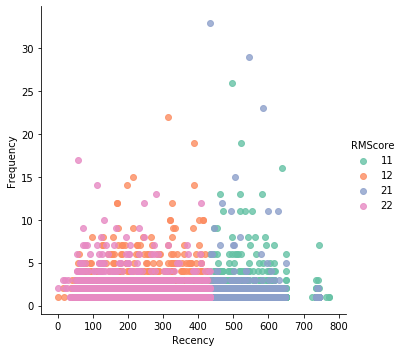

In [23]:
sns.lmplot(x = 'Recency', y = 'Frequency', 
           data = df_RFM, 
           hue = "RMScore", 
           palette="Set2", fit_reg = False)    

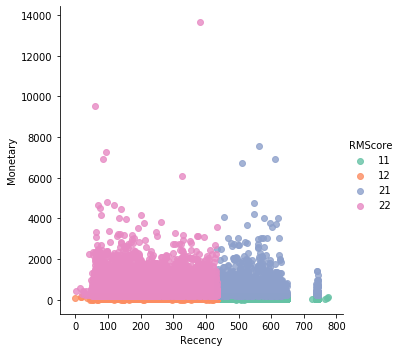

In [24]:
sns.lmplot(x = 'Recency', y = 'Monetary', 
           data = df_RFM, 
           hue = "RMScore", 
           palette="Set2", fit_reg = False) 

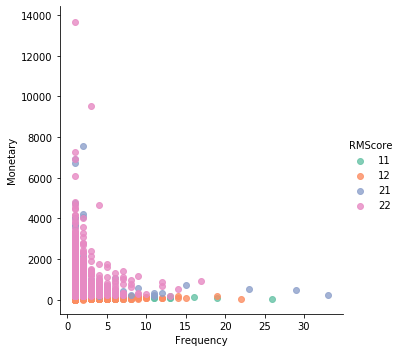

In [25]:
sns.lmplot(x = 'Frequency', y = 'Monetary', 
           data = df_RFM, 
           hue = "RMScore", 
           palette="Set2", fit_reg = False) 

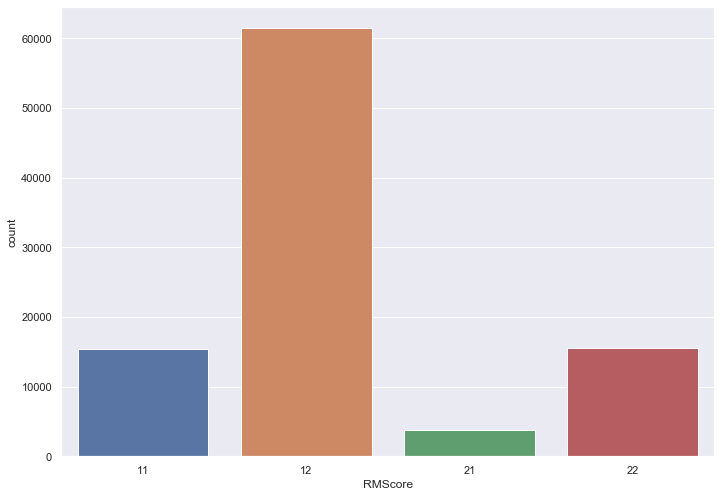

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(x = 'RMScore', data = df_RFM)

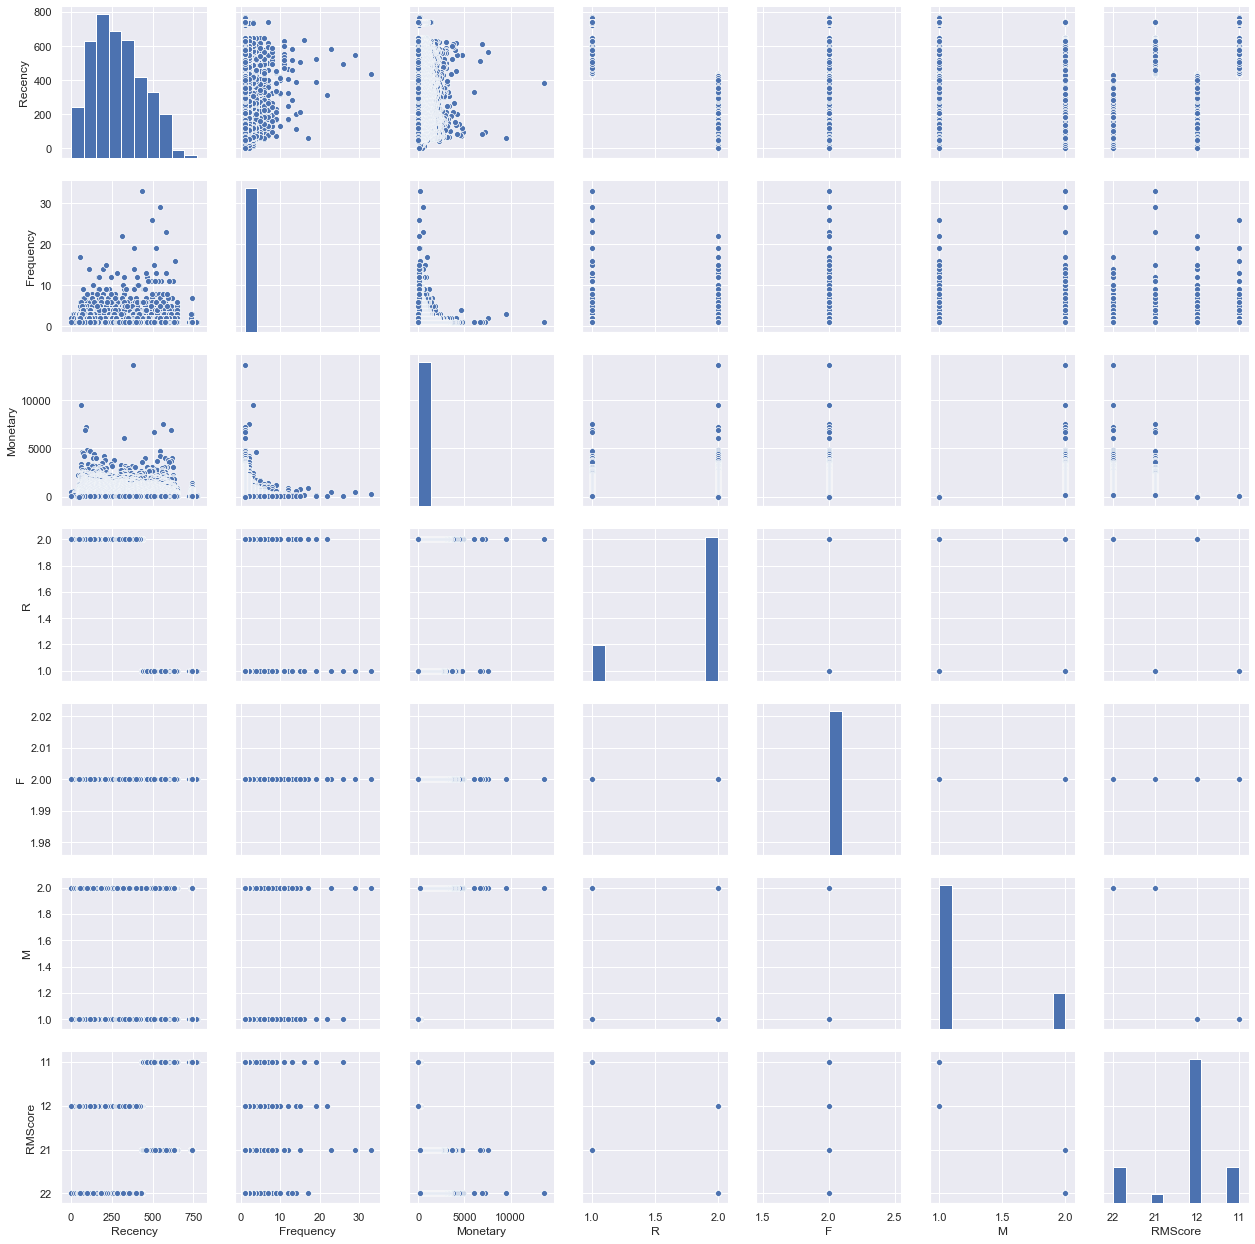

In [27]:
sns.pairplot(df_RFM)